In [ ]:
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Kaggle Dataset**

In [ ]:
KAGGLE_DATASET_PATH = 'hseyinsaidkoca/recyclable-solid-waste-dataset-on-5-background-co'
KAGGLE_ZIP = 'recyclable-solid-waste-dataset-on-5-background-co.zip'
KAGGLE_DIR = 'solid_waste/black'
ZIP_DATASET = KAGGLE_ZIP 
DATASET_DIR = KAGGLE_DIR
DATASET_PATH = os.path.join(os.getcwd(), DATASET_DIR)

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          20656        577  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           1892         49  1.0              
darshanprabhu09/stock-prices-for                          Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16            854         26  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset             

In [ ]:
!kaggle datasets download -d 'hseyinsaidkoca/recyclable-solid-waste-dataset-on-5-background-co'

 96% 121M/126M [00:02<00:00, 54.6MB/s]
100% 126M/126M [00:02<00:00, 49.0MB/s]


In [ ]:
# Download Dataset From Kaggle
cmd_kaggle = f'kaggle datasets download -d {KAGGLE_DATASET_PATH}'
cmd = cmd_kaggle
os.system(cmd)

0

In [ ]:
def remove_existing_dir(dir):
    if os.path.exists(dir) and os.path.isdir(dir):
        shutil.rmtree(dir)
def remove_existing_file(path):
    if os.path.exists(path) and os.path.isfile(path):
        os.remove(path)

def create_dir_if_not_exists(dir):
    if not os.path.exists(dir):
        os.makedirs(dir, exist_ok=True)

def get_file_size(path):
    return humanize.naturalsize(os.path.getsize(path))

def get_dir_size(path):
    size = 0
    for path, dirs, files in os.walk(path):
        for f in files:
            fp = os.path.join(path, f)
            size += os.path.getsize(fp)
    return humanize.naturalsize(size)

def copy(src, dst):
    filename = os.path.basename(dst)
    remove_existing_dir(dst)
    remove_existing_file(dst)
    create_dir_if_not_exists(re.sub(filename, '', dst))

    if os.path.isdir(src):
        shutil.copytree(src, dst)
    elif os.path.isfile(src):
        shutil.copy(src, dst)
    else:
        print(f'{src} is neither directory nor file')

def get_nested_file_path(dir):
    paths = []
    for root, dirs, files in os.walk(dir):
     for file in files:
        path = os.path.join(root, file)
        paths.append(path)
    return paths

def count_files_in_dir(dir):
    return sum(len(files) for _, _, files in os.walk(dir))

In [ ]:
!unzip -q -n $ZIP_DATASET

In [ ]:
LABELS = sorted(os.listdir(DATASET_PATH))
print(f'Current Label {LABELS}')

Current Label ['glass', 'metal', 'plastic']


In [ ]:
data_dir = DATASET_PATH
pthlib = pathlib.Path(data_dir)
image_count = len(list(pthlib.glob('*/*.jpg')))
print(image_count)

1029


#**Drive**

In [ ]:
data_dir ='/content/drive/MyDrive/datasets/nyoba doang asli'
pthlib = pathlib.Path(data_dir)
image_count = len(list(pthlib.glob('*/*.jpg')))
print(image_count)

810


#**Prepros**

In [ ]:
panjang=150
lebar=150
batch=30

In [ ]:
#def to_grayscale_then_rgb(image):
  #  image = tf.image.rgb_to_grayscale(image)
   # return image

datagen = ImageDataGenerator(
    rescale=1/255,
    #preprocessing_function= tf.image.rgb_to_grayscale(image),
    rotation_range=30,
    brightness_range=[0.5,1.5],
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)



In [ ]:
train_generator = datagen.flow_from_directory(data_dir,
                                              target_size = (panjang, lebar),
                                              batch_size = batch,
                                              class_mode = 'categorical',
                                              subset = 'training', 
                                              shuffle = False) 

Found 650 images belonging to 5 classes.


In [ ]:
val_generator=datagen.flow_from_directory(
    data_dir,
    target_size=(panjang,lebar),
    batch_size= batch,
    class_mode='categorical',
    subset= 'validation',
    shuffle=False
)

Found 160 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150,150,3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False


--2023-05-29 17:37:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   225MB/s    in 0.4s    

2023-05-29 17:37:36 (225 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model.summary()

# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x= layers.Dropout(0.5)(x)
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
result = model.fit(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = train_generator.samples//batch,
            epochs = 20,
            validation_steps = val_generator.samples//batch,
            verbose = 1)

Epoch 1/20
21/21 [==============================] - 86s 4s/step - loss: 0.2220 - accuracy: 0.9161 - val_loss: 0.1461 - val_accuracy: 0.9600
Epoch 2/20
21/21 [==============================] - 78s 4s/step - loss: 0.2215 - accuracy: 0.9242 - val_loss: 0.1649 - val_accuracy: 0.9533
Epoch 3/20
21/21 [==============================] - 79s 4s/step - loss: 0.2243 - accuracy: 0.9242 - val_loss: 0.1832 - val_accuracy: 0.9533
Epoch 4/20
21/21 [==============================] - 86s 4s/step - loss: 0.2495 - accuracy: 0.9143 - val_loss: 0.1286 - val_accuracy: 0.9533
Epoch 5/20
21/21 [==============================] - 76s 4s/step - loss: 0.1859 - accuracy: 0.9323 - val_loss: 0.1844 - val_accuracy: 0.9600
Epoch 6/20
21/21 [==============================] - 85s 4s/step - loss: 0.1868 - accuracy: 0.9387 - val_loss: 0.2114 - val_accuracy: 0.9133
Epoch 7/20
21/21 [==============================] - 82s 4s/step - loss: 0.1559 - accuracy: 0.9403 - val_loss: 0.1854 - val_accuracy: 0.9400
Epoch 8/20
21/21 [==

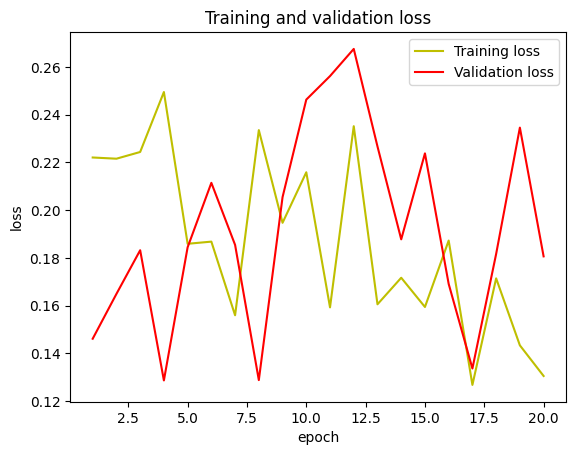

In [ ]:
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

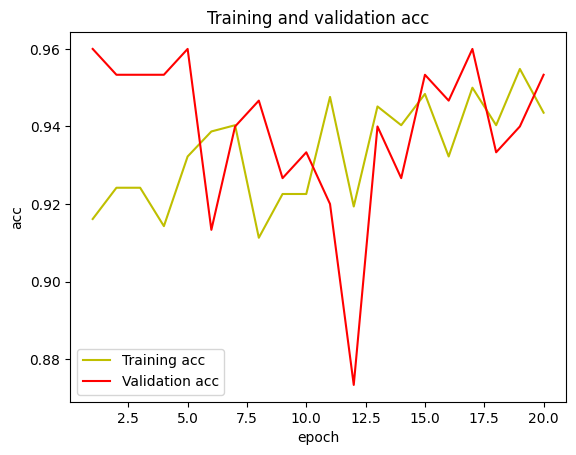

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
model.save('/content/mdlh5.h5')

In [ ]:
from keras.models import load_model
model=load_model('/content/mdlh5.h5')

In [ ]:
#prep nyamain format
img = cv2.imread('/content/bopal1.jpg')
img = cv2.resize(img, (150,150))

img = np.expand_dims(img, axis=0)

In [ ]:
prediksi = model.predict(img)

1/1 [==============================] - 1s 1s/step


In [ ]:
baca = tf.nn.softmax(prediksi[0])
baca

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5761169 , 0.21194157, 0.21194157], dtype=float32)>

In [ ]:
class_name = train_generator.class_indices
class_name = list(dict.keys(class_name))
print(class_name)

['Botol', 'Kain', 'Kaleng', 'Plastik', 'kaca 2']


In [ ]:
kelas_prediksi = class_name[np.argmax(baca)]
conf = 100*max(baca)
#conf = round(100*max(baca),2)

In [ ]:
#print('Gambar diprediksi sebagai {}'.format(kelas_prediksi))
print('Gambar diprediksi sebagai {},dengan konfiden {}%'.format(kelas_prediksi,conf))

Gambar diprediksi sebagai kaca 2,dengan konfiden 57.611690521240234%


In [ ]:
image_path = '/content/bopal.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)
image_array = image_array / 255.0  # Normalisasi

In [ ]:
predictions = model.predict(image_array)
predicted_class = tf.argmax(predictions[0])

1/1 [==============================] - 0s 199ms/step


In [ ]:
description = ""
if predicted_class == 0:
    description = "Ini adalah botol."
elif predicted_class == 1:
    description = "Ini adalah kain."
elif predicted_class == 2:
    description = "Ini adalah kaleng."
elif predicted_class == 3:
    description = "Ini adalah plastik."
elif predicted_class == 3:
    description = "Ini adalah kaca."

  
print(description)